[*********************100%***********************]  1 of 1 completed


278470.KS 데이터 (최근 5년):
 Price          Close      High       Low      Open    Volume
Ticker     278470.KS 278470.KS 278470.KS 278470.KS 278470.KS
Date                                                        
2025-07-31  183700.0  188500.0  175900.0  176000.0    630657
2025-08-01  172000.0  180400.0  167800.0  179800.0    612884
2025-08-04  178600.0  179500.0  173100.0  173500.0    334690
2025-08-05  187300.0  189700.0  181400.0  184500.0    595552
2025-08-06  208500.0  224000.0  185200.0  194700.0   2829191

이동평균 및 거래 신호 데이터:
 Price          Close       Short_MA       Long_MA Signal Position
Ticker     278470.KS                                             
Date                                                             
2025-07-24  170310.0  137513.325625  76804.030313      1      0.0
2025-07-25  171700.0  138804.494844  77402.021641      1      0.0
2025-07-28  167500.0  139990.118281  77989.785879      1      0.0
2025-07-29  181300.0  141410.608750  78635.287520      1      0.0
2025-0

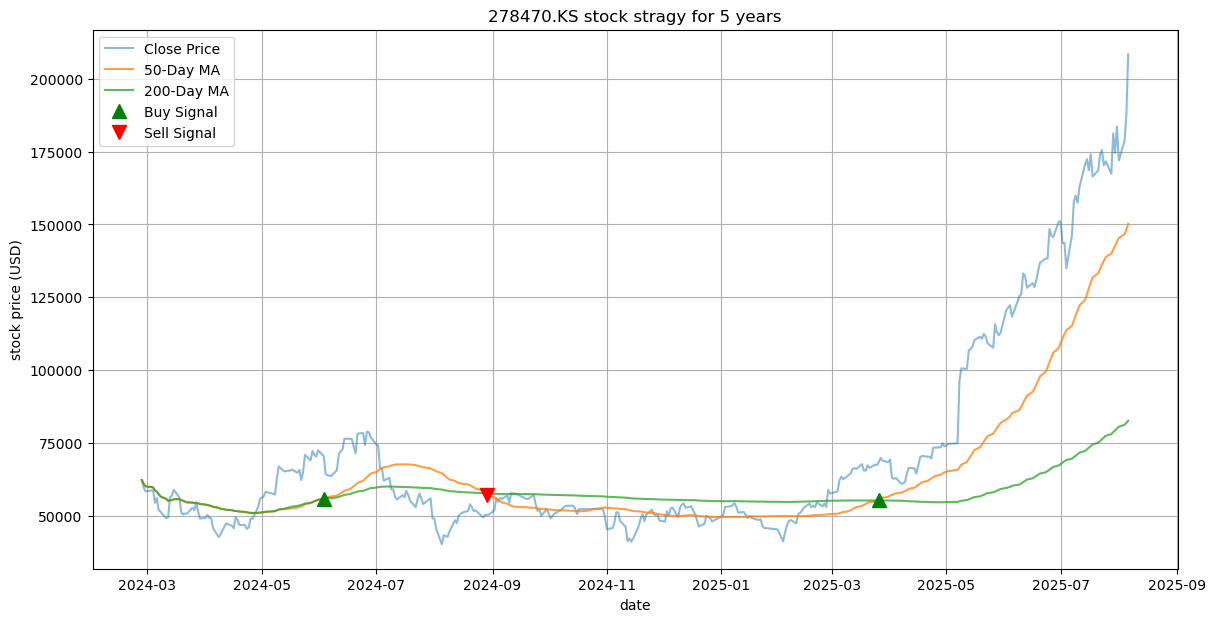

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. 데이터 다운로드
ticker = '278470.KS'
# 오늘 날짜로부터 5년 전 데이터 다운로드
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

data = yf.download(ticker, start=start_date, end=end_date)

if data.empty:
    print(f"{ticker}에 대한 데이터를 가져오는 데 실패했습니다. 티커를 확인하거나 날짜 범위를 조정해 주세요.")
else:
    print(f"{ticker} 데이터 (최근 5년):\n", data.tail())

    # 2. 이동평균 계산
    # 단기 이동평균 (예: 50일)
    short_window = 50
    # 장기 이동평균 (예: 200일)
    long_window = 200

    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

    # 3. 거래 신호 생성
    # 'Signal' 컬럼: 1은 매수, -1은 매도, 0은 유지
    data['Signal'] = 0
    # 단기 MA가 장기 MA를 상향 돌파하면 매수 신호 (1)
    data.loc[data.index[short_window:], 'Signal'] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
    # 단기 MA가 장기 MA를 하향 돌파하면 매도 신호 (-1)
    # 'Signal' 컬럼의 변화를 감지하여 실제 거래 시점을 포착 (Positions)
    data['Position'] = data['Signal'].diff()

    print("\n이동평균 및 거래 신호 데이터:\n", data[['Close', 'Short_MA', 'Long_MA', 'Signal', 'Position']].tail(10))

    # 4. 시각화
    plt.figure(figsize=(14, 7))

    # 주가 그래프
    plt.plot(data['Close'], label='Close Price', alpha=0.5)
    # 단기 이동평균선
    plt.plot(data['Short_MA'], label=f'{short_window}-Day MA', alpha=0.75)
    # 장기 이동평균선
    plt.plot(data['Long_MA'], label=f'{long_window}-Day MA', alpha=0.75)

    # 매수 신호 지점 (Position == 1)
    plt.plot(data[data['Position'] == 1].index,
             data['Short_MA'][data['Position'] == 1],
             '^', markersize=10, color='g', lw=0, label='Buy Signal')

    # 매도 신호 지점 (Position == -1)
    plt.plot(data[data['Position'] == -1].index,
             data['Short_MA'][data['Position'] == -1],
             'v', markersize=10, color='r', lw=0, label='Sell Signal')

    plt.title(f'{ticker} stock stragy for 5 years')
    plt.xlabel('date')
    plt.ylabel('stock price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [3]:
pip install yfinance

# 미국주식 이평선 분석

YF.download() has changed argument auto_adjust default to True
SHOP 데이터 (최근 5년):
 Price            Close        High         Low        Open   Volume
Ticker            SHOP        SHOP        SHOP        SHOP     SHOP
Date                                                               
2025-07-30  123.010002  125.940002  122.160004  123.970001  6702700
2025-07-31  122.209999  126.580002  122.050003  125.349998  8493500
2025-08-01  118.599998  120.190002  115.949997  118.050003  9886700
2025-08-04  125.209999  125.489998  120.230003  120.230003  6881700
2025-08-05  127.000000  127.230003  123.000000  125.000000  9193700

이동평균 및 거래 신호 데이터:
 Price            Close        5_MA     20_MA     50_MA      120_MA     200_MA  \
Ticker            SHOP                                                          
Date                                                                            
2025-07-23  122.209999  125.633998  117.5305  111.5308  105.854167  103.50565   
2025-07-24  122.080002  124.69

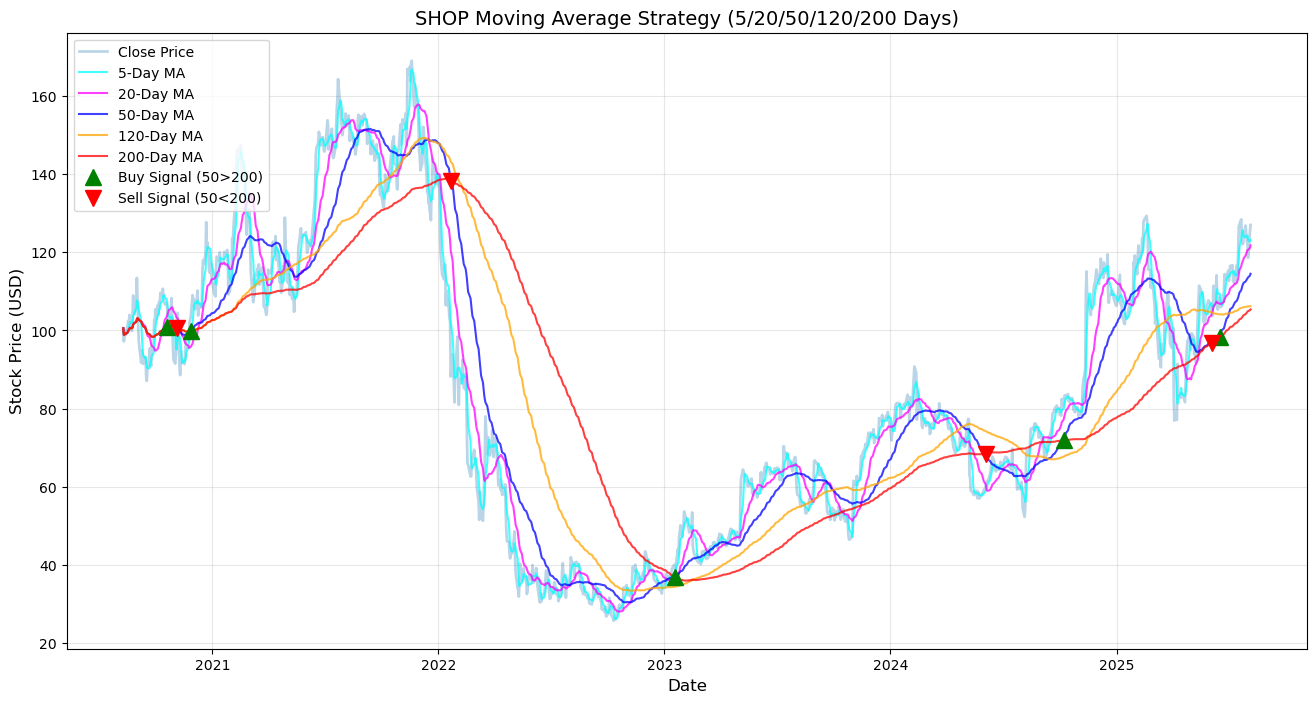

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. 데이터 다운로드
ticker = 'SHOP'  # 미국 주식 티커 (예: Apple Inc.)
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

data = yf.download(ticker, start=start_date, end=end_date, progress=False)

if data.empty:
    print(f"{ticker}에 대한 데이터를 가져오는 데 실패했습니다. 티커를 확인하거나 날짜 범위를 조정해 주세요.")
else:
    print(f"{ticker} 데이터 (최근 5년):\n", data.tail())

    # 2. 이동평균 계산 (기존 50일, 200일 + 새로 추가)
    windows = [5, 20, 50, 120, 200]  # 5일, 20일, 50일, 120일, 200일
    ma_labels = ['5-Day', '20-Day', '50-Day', '120-Day', '200-Day']
    colors = ['cyan', 'magenta', 'blue', 'orange', 'red']  # 각 이평선 색상
    
    for window, label in zip(windows, ma_labels):
        data[f'{window}_MA'] = data['Close'].rolling(window=window, min_periods=1).mean()

    # 3. 거래 신호 생성 (기존 전략 유지 - 50일 vs 200일 기준)
    data['Signal'] = 0
    data.loc[data.index[50:], 'Signal'] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1, 0)
    data['Position'] = data['Signal'].diff()

    print("\n이동평균 및 거래 신호 데이터:\n", data[['Close', '5_MA', '20_MA', '50_MA', '120_MA', '200_MA', 'Signal', 'Position']].tail(10))

    # 4. 시각화 (추가된 이평선 반영)
    plt.figure(figsize=(16, 8))
    plt.plot(data['Close'], label='Close Price', alpha=0.3, linewidth=2)

    # 모든 이동평균선 플롯
    for window, color, label in zip(windows, colors, ma_labels):
        plt.plot(data[f'{window}_MA'], label=f'{label} MA', color=color, alpha=0.75)

    # 매수/매도 신호 표시 (기존 전략 기준)
    plt.plot(data[data['Position'] == 1].index,
             data['50_MA'][data['Position'] == 1],
             '^', markersize=12, color='g', lw=0, label='Buy Signal (50>200)')
    plt.plot(data[data['Position'] == -1].index,
             data['50_MA'][data['Position'] == -1],
             'v', markersize=12, color='r', lw=0, label='Sell Signal (50<200)')

    plt.title(f'{ticker} Moving Average Strategy (5/20/50/120/200 Days)', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price (USD)', fontsize=12) # Label changed to USD
    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.show()


SHOP 데이터 (최근 5년):
 Price            Close        High         Low        Open   Volume
Ticker            SHOP        SHOP        SHOP        SHOP     SHOP
Date                                                               
2025-07-30  123.010002  125.940002  122.160004  123.970001  6702700
2025-07-31  122.209999  126.580002  122.050003  125.349998  8493500
2025-08-01  118.599998  120.190002  115.949997  118.050003  9886700
2025-08-04  125.209999  125.489998  120.230003  120.230003  6881700
2025-08-05  127.000000  127.230003  123.000000  125.000000  9193700

이동평균 및 거래 신호 데이터:
 Price            Close        5_MA     20_MA     50_MA      120_MA     200_MA  \
Ticker            SHOP                                                          
Date                                                                            
2025-07-23  122.209999  125.633998  117.5305  111.5308  105.854167  103.50565   
2025-07-24  122.080002  124.699998  117.9400  111.8856  105.878333  103.72535   
2025-07-25  

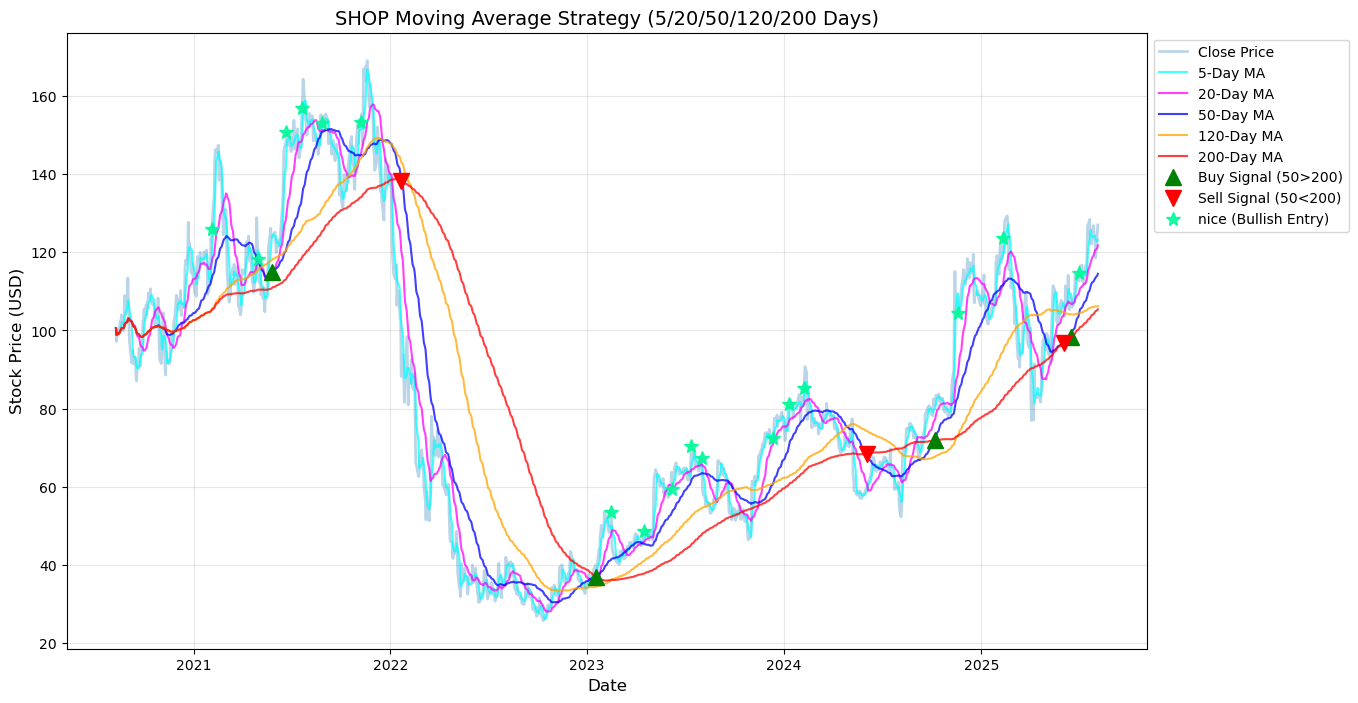

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. 데이터 다운로드
ticker = 'SHOP'  # 미국 주식 티커 (예: Apple Inc.)
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

data = yf.download(ticker, start=start_date, end=end_date, progress=False)

if data.empty:
    print(f"{ticker}에 대한 데이터를 가져오는 데 실패했습니다. 티커를 확인하거나 날짜 범위를 조정해 주세요.")
else:
    print(f"{ticker} 데이터 (최근 5년):\n", data.tail())

    # 2. 이동평균 계산 (기존 50일, 200일 + 새로 추가)
    windows = [5, 20, 50, 120, 200]  # 5일, 20일, 50일, 120일, 200일
    ma_labels = ['5-Day', '20-Day', '50-Day', '120-Day', '200-Day']
    colors = ['cyan', 'magenta', 'blue', 'orange', 'red']  # 각 이평선 색상
    
    for window, label in zip(windows, ma_labels):
        data[f'{window}_MA'] = data['Close'].rolling(window=window, min_periods=1).mean()

    # 3. 거래 신호 생성 (기존 전략 유지 - 50일 vs 200일 기준)
    data['Signal'] = 0
    min_signal_idx = max(50, 200) 
    if len(data) > min_signal_idx:
        data.loc[data.index[min_signal_idx:], 'Signal'] = np.where(data['50_MA'][min_signal_idx:] > data['200_MA'][min_signal_idx:], 1, 0)
    else:
        print("Warning: Not enough data points to generate full 50-day and 200-day MA signals.")
        data['Signal'] = 0 
        
    data['Position'] = data['Signal'].diff()

    # 4. 정배열 'nice' 신호 생성 및 진입 신호 (가장 중요한 변경 사항!)
    min_bullish_idx = max(windows)
    
    if len(data) > min_bullish_idx:
        # 4-1. 모든 MA가 정배열인 상태를 나타내는 임시 컬럼 생성
        data['Is_Bullish_Aligned'] = np.where(
            (data['5_MA'] > data['20_MA']) &
            (data['20_MA'] > data['50_MA']) &
            (data['50_MA'] > data['120_MA']) &
            (data['120_MA'] > data['200_MA']),
            1, 0
        )
        
        # 4-2. 역정배열(0)에서 정배열(1)로 '전환'되는 시점만 포착
        # Is_Bullish_Aligned가 0에서 1로 바뀔 때만 1을 표시
        data['Nice_Entry_Signal'] = np.where(
            (data['Is_Bullish_Aligned'].shift(1) == 0) & (data['Is_Bullish_Aligned'] == 1),
            1, 0
        )
        # NaN 값(초기 부분)은 0으로 채움
        data['Nice_Entry_Signal'] = data['Nice_Entry_Signal'].fillna(0)
    else:
        data['Is_Bullish_Aligned'] = 0
        data['Nice_Entry_Signal'] = 0 # 데이터가 부족하면 신호 없음


    print("\n이동평균 및 거래 신호 데이터:\n", data[['Close', '5_MA', '20_MA', '50_MA', '120_MA', '200_MA', 'Signal', 'Position', 'Is_Bullish_Aligned', 'Nice_Entry_Signal']].tail(10))

    # 5. 시각화 (추가된 이평선 반영)
    plt.figure(figsize=(16, 8))
    plt.plot(data['Close'], label='Close Price', alpha=0.3, linewidth=2)

    # 모든 이동평균선 플롯
    for window, color, label in zip(windows, colors, ma_labels):
        plt.plot(data[f'{window}_MA'], label=f'{label} MA', color=color, alpha=0.75)

    # 매수/매도 신호 표시 (기존 전략 기준)
    plt.plot(data[data['Position'] == 1].index,
             data['50_MA'][data['Position'] == 1],
             '^', markersize=12, color='g', lw=0, label='Buy Signal (50>200)')
    plt.plot(data[data['Position'] == -1].index,
             data['50_MA'][data['Position'] == -1],
             'v', markersize=12, color='r', lw=0, label='Sell Signal (50<200)')

    # 정배열 'nice' 진입 신호 표시 추가 (수정된 부분)
    plt.plot(data[data['Nice_Entry_Signal'] == 1].index,
             data['Close'][data['Nice_Entry_Signal'] == 1], # 종가 위치에 마커 표시
             '*', markersize=10, color='mediumspringgreen', alpha=0.9, lw=0, label='nice (Bullish Entry)')


    plt.title(f'{ticker} Moving Average Strategy (5/20/50/120/200 Days)', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price (USD)', fontsize=12) 
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10) 
    plt.subplots_adjust(right=0.8) 
    plt.grid(True, alpha=0.3)
    plt.show()